Regresión Logística
===

* 28:09 min | Ultima modificación: Abril 14, 2021 | [YouTube](https://youtu.be/QYqwYt9uYtM)

## Descripción del problema

Se desea determinar a cuál clase ($A$, $B$ o $C$) pertenece un elemento, a partir de resultados previamente recolectados.

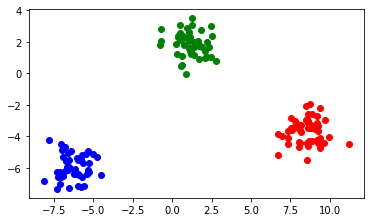

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

NPOINTS = 150

X, d = make_blobs(
    n_samples=NPOINTS,
    n_features=2,
    centers=3,
    cluster_std=0.8,
    shuffle=False,
    random_state=12345,
)

plt.scatter(X[:50, 0], X[:50, 1], color="red")
plt.scatter(X[50:100, 0], X[50:100, 1], color="blue")
plt.scatter(X[100:, 0], X[100:, 1], color="green")
plt.gca().set_aspect("equal", adjustable="box")

## Ecuación de la Regresión Logística

La ecuación de la regresión logística es:

$$y = \sigma \left( w_0 + \sum_{i=i}^n w_i x_{i} \right)$$

puede interpretarse como la probabilidad de que el punto $\mathbf{x}_i$ pertenezca a la clase de interés.

La función logística es definida como:

$$\sigma(u) = \frac{1}{1+\exp(-u)}$$

## Función de costo

En la regresión logística, los parámetros del modelo se estiman a través de la minimización de la función de entropía cruzada, definida como:

$$ 
L = - \sum_i^P d_i \cdot \log(y_i) + 
(1-d_i) \cdot \log(1 - y_i)
$$ 

En esta función de error se debe analizar el caso para cada patrón:

* Si $d_i = 1$, entonces se desea minimizar $-\log(y_i)$ por lo que $y_i$ debe ser lo más cercana posible a 1.0 (recuerde que la función logística genera valores entre 0 y 1, y que el término $(1 - d_i) = 0$). 

* Si $d_i = 0$, entonces se desea minimizar $-\log(1 - y_i)$ por lo que $y_i$ debe ser lo más cercana posible a 0.0. 

## Estimación de parámetros del modelo

Los parámetros óptimos del modelo se pueden obtener usando el método del gradiente descendente estocástico.

## Derivada de la función sigmoidea

Para el cómputo de la función de costo (función de entropía cruzada) se requeiere, primero, computar la derivada de la función sigmoidea definida como:

$$
\sigma (u) = \frac{1}{1+\exp(-u)}
$$

La derivada se computa como:

$$
\begin{split}
    \frac{d}{du} \sigma(u) 
    & = \frac{d}{du} [1 + \exp(-u)] ^ {-1}
    \\ \\
    & = - [1 + \exp(-u)]^{-2} \cdot \frac{d}{du} [1 + \exp(-u)] 
    \\ \\
    & = - [1 + \exp(-u)]^{-2} \cdot \frac{d}{du} [\exp(-u)] 
    \\ \\
    & = - [1 + \exp(-u)]^{-2} \cdot \exp(-u) \cdot \frac{d}{du} (-u)
    \\ \\ 
    & = - [1 + \exp(-u)]^{-2} \cdot \exp(-u) \cdot -1 
    \\ \\
    & = [1 + \exp(-u)]^{-2} \cdot \exp(-u) 
    \\ \\
    & = \frac{\exp(-u) }{[1 + \exp(-u)]^2}
    \\ \\
    & = \frac{[1 + \exp(-u)] - 1}{[1 + \exp(-u)]^2}
    \\ \\
    & = \frac{1}{1 + \exp(-u)}
        \left[
            \frac{[1 + \exp(-u)] - 1}{1 + \exp(-u)}
        \right]
    \\ \\
    & = \sigma(u) \cdot 
        \left[
            \frac{1 + \exp(-u)}{1 + \exp(-u)} 
            - \frac{1}{1 + \exp(-u)} 
        \right]
    \\ \\
    & = \sigma(u) \cdot [1 - \sigma(u)]
\end{split}
$$

## Derivada de la función de costo

Se computa como:

$$
\begin{split}
\frac{\partial }{\partial w_j} L 
    & = \frac{\partial }{\partial w_j} 
    \left[ 
        - \sum_i^P d_i \cdot \log(y_i) + (1-d_i) \cdot \log(1 - y_i) 
    \right] 
    \\ \\
    & = - \sum_i^P \frac{\partial }{\partial w_j} 
    \left[     
        d_i \cdot \log(y_i) + (1-d_i) \cdot \log(1 - y_i) 
    \right] 
    \\ \\
    & = - \sum_i^P d_i \cdot \frac{\partial }{\partial w_j} \log(y_i)
       + (1-d_i) \cdot \frac{\partial }{\partial w_j} \log(1 - y_i)
    \\ \\
    & = - \sum_i^P d_i \cdot \frac{1}{y_i}   \frac{\partial }{\partial w_j} y_i
       + (1-d_i) \cdot \frac{1}{1-y_i} \frac{\partial }{\partial w_j} (1 - y_i)
    \\ \\
    & = - \sum_i^P d_i \cdot \frac{1}{y_i} \cdot \left[ y_i \cdot (1 - y_i) \right] 
       \frac{\partial }{\partial w_j} u
       - (1-d_i) \cdot \frac{1}{1-y_i} \cdot \left[ y_i \cdot (1 - y_i) \right]
       \cdot \frac{\partial }{\partial w_j} u
    \\ \\
    & = - \sum_i^P d_i \cdot  (1 - y_i)
       \frac{\partial }{\partial w_j} u
       - (1-d_i) \cdot y_i 
       \cdot \frac{\partial }{\partial w_j} u
\end{split}
$$

A partir de la ecuación anterior es posible computar el gradiente para los parámetros del modelo

$$
\frac{\partial}{\partial w_0} L = - \sum_i^P d_i \cdot  (1 - y_i)
       - (1-d_i) \cdot y_i 
$$

$$
\frac{\partial}{\partial w_j} L = - \sum_i^P x_j \cdot [d_i \cdot  (1 - y_i)
       - (1-d_i) \cdot y_i] 
$$

**Ejercicio.---** Programe el método del gradiente descendente estocástico para minimizar la función de entropía cruzada y apliquelo al problema propuesto.

## Códificación de problemas con más de dos clases

En la regresión logística se desea construir un modelo que permite determinar si un patrón ($x_1$, $x_2$) pertenece a una clase determinada o no. Ya que el ejemplo presentado contiene más de dos clases debe ser recodificado; una forma es especificar un modelo que indique si ($x_1$, $x_2$) pertenece a la clase $A$ o al resto (las clases {$A$, $B$}); y otro modelo que indique si pertenece a la clase $B$ o no. Si el patrón no pertenece ni a $A$ ni a $B$, entonces pertenece a $C$. La secuencia de decisiones descrita puede ser representada por un árbol de decisiones.

## Comparación con el modelo de regresión

A partir de este punto, el problema consiste en determinar si un patrón pertenece a una de dos clases mutuamente exclusivas y colectivamente exhaustivas (un patrón no puede pertenecer a las dos clases simultáneamente y cada patrón debe pertenecer a una clase de las dos clases posibles). Si se usa una variable indicadora $y$ que vale $1$ cuando el patrón pertenece a la clase $A$ y cero cuando no pertenece, entonces se podría plantear un modelo lineal de la forma:

$$ y =
   \begin{cases}
      1, & \text{if $\theta_0 + \theta_1 x_1 + \theta_2 x_2 > 0$} \\
      \\
      0, &\text{en caso contrario.}
   \end{cases}
$$

La estimación de los parámetros del modelo de regresión en la ecuación anterior no puede realizarse usando regresión lineal.

En la siguiente figura, se presenta un ejemplo con un grupo de puntos en el eje $X$ que pertenecen a una de dos clases; si $y=1$ el punto pertenece a la clase $A$ y en caso contrario a la clase $B$. Si se ajusta un modelo de regresión lineal de la forma:

$$y = \theta_0 + \theta_1 x$$

se obtiene la línea recta que aparece en dicha figura.

![assets/logreg-1.jpg](assets/logreg-1.jpg)

Como puede observarse, el modelo no permite realizar la discriminación entre las clases de cada punto. Para ello, los valores de $y$ deben limitarse al intervalo $[0, 1]$.  

La función logística es definida como:

$$\sigma(u) = \frac{1}{1+\exp(-u)}$$

![assets/logreg-2.jpg](assets/logreg-2.jpg)

La regresión logística se define como:

$$y = \sigma(\theta_0 + \theta_1 x_1 + \theta_2 x_2)$$

La cual puede interpretarse como la probabilidad de que el punto ($x_1$, $x_2$) pertenezca a la clase $A$.

Al aplicar la regresión logística al segundo ejemplo planteado se obtiene la línea roja de la figura de abajo, la cual representa la probabilidad de pertenencia de un punto a la clase $A$. Para $y$ = 0.5, hay una probabilidad del 50% de que el patrón pertenezca a la clase $A$ y 50% de que no pertenezca; este es un punto de indeterminación, de tal forma que el punto $x$ en que se da esta valor se conoce como frontera de decisión.  

![assets/logreg-3.jpg](assets/logreg-3.jpg)

## Fronteras de decisión

En la siguiente figura se presenta un problema de clasificación para tres clases diferentes. Cada línea representa la frontera de decisión entre un grupo y los demás. Si las flechas indican la probabilidad de pertenencia a un grupo, noté que hay una región de indeterminación en el centro.

![assets/logreg-4.jpg](assets/logreg-4.jpg)

## Solución usando Python

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

logisticRegression = LogisticRegression(
    penalty="none",      # ‘l1’, ‘l2’, ‘elasticnet’, ‘none’
    tol=0.0001,          # stop criteria
    C=1.0,               # factor inverso para regularizacion (SVM)
    fit_intercept=True,  #
    class_weight=None,   # None, dict or ‘balanced’
    random_state=None,   #
    solver="lbfgs",      # 'newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’
    max_iter=100,        #
    multi_class="auto",  # ‘ovr’, ‘multinomial’, ‘auto’
    verbose=0,           #
    warm_start=False,    # ?re-usa la solución previa
    l1_ratio=None,       # Elastic-Net mixing parameter, with 0 <= l1_ratio <= 1
)

logisticRegression.fit(X, d)

logisticRegression.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
logisticRegression.predict([[2.5, -4.0]])

array([0])

In [4]:
logisticRegression.intercept_

array([-5.32731038, -2.58361454,  7.91092493])

In [5]:
logisticRegression.coef_

array([[ 1.47085335, -1.78916427],
       [-1.03371155, -1.63099238],
       [-0.4371418 ,  3.42015665]])

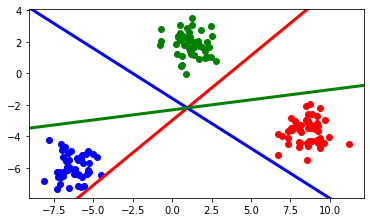

In [6]:
import numpy as np

plt.scatter(X[:50,0], X[:50,1], color='red')
plt.scatter(X[50:100,0], X[50:100,1], color='blue')
plt.scatter(X[100:,0], X[100:,1], color='green')
plt.gca().set_aspect('equal', adjustable='box')

xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()

xplot = np.linspace(start=xlim[0], stop=xlim[1], num=20)

fronteraA = (- logisticRegression.intercept_[0] / logisticRegression.coef_[0][1] 
             - logisticRegression.coef_[0][0] / logisticRegression.coef_[0][1] * xplot)

fronteraB = (- logisticRegression.intercept_[1] / logisticRegression.coef_[1][1] 
             - logisticRegression.coef_[1][0] / logisticRegression.coef_[1][1] * xplot)

fronteraC = (- logisticRegression.intercept_[2] / logisticRegression.coef_[2][1] 
             - logisticRegression.coef_[2][0] / logisticRegression.coef_[2][1] * xplot)

plt.plot(xplot, fronteraA, color='red', linewidth=3)
plt.plot(xplot, fronteraB, color='blue', linewidth=3)
plt.plot(xplot, fronteraC, color='green', linewidth=3);

plt.xlim(xlim)
plt.ylim(ylim);

In [7]:
logisticRegression.predict_proba(X)[0:10]

array([[9.99999996e-01, 3.37213413e-09, 5.87763928e-10],
       [9.99999987e-01, 9.83061700e-10, 1.16679900e-08],
       [1.00000000e+00, 4.42184492e-10, 2.02839427e-13],
       [9.99999997e-01, 2.32571602e-09, 3.57170430e-10],
       [9.99999999e-01, 2.91545720e-10, 1.06746679e-09],
       [9.99999793e-01, 2.06351621e-07, 9.43530066e-10],
       [1.00000000e+00, 1.30864625e-10, 2.63441344e-12],
       [9.99999984e-01, 1.22786241e-08, 3.48299674e-09],
       [1.00000000e+00, 5.12857770e-12, 2.08349752e-14],
       [9.99999986e-01, 1.26548112e-08, 8.47345532e-10]])